In [3]:
# Auhtor:       Piotr Artman
# StudentID:    C00220223
# Subject:      Data Science and Machine Learning 1
# Project:      Analysis of trends for gold price

# DESCLAIMER:   This notebook is not financial advice. 
#               My work is focused on the use of available 
#               technological capabilities to conduct gold price analysis.

# WARNING:      WORK IN PROGRESS
# 
# Work plan:    1. Download bullion gold prices from NASDAQ.    https://data.nasdaq.com          DONE
#               2. Download data from ECB                       https://data.ecb.europa.eu
#               3. Download data from FED                       https://fred.stlouisfed.org
#               4. Download data from OECD                      https://data.oecd.org
#               5. Download data from EU.                       https://data.europa.eu/en
#               6. Download data from Frankfurt Stock Exchange                  
#               7. Import data from NASDAQ into memory 
#                  and calculate moving average and use it to predict price of gold bullion.
#               8. Import remaining data into memory
#                  and use random forest algorithm to improve predictions.  

In [4]:
# Step 1 - importing software components

import nasdaqdatalink
from API_KEYS import nasdaq_api_key
nasdaqdatalink.ApiConfig.api_key = nasdaq_api_key.discrete_value


from IPython.display import display

import matplotlib.pyplot as plt

In [5]:
# Step 2 - connecting do data from NASDAQ 

# import gold bullion price on London Bullion Market Association from Nasdq

gold_bullion_price = nasdaqdatalink.get('LBMA/GOLD')

In [10]:
# Step 3 check what is inside fetched data
display(gold_bullion_price)

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
1968-01-02,35.18,NaN,14.641,NaN,NaN,NaN
1968-01-03,35.16,NaN,14.617,NaN,NaN,NaN
1968-01-04,35.14,NaN,14.603,NaN,NaN,NaN
1968-01-05,35.14,NaN,14.597,NaN,NaN,NaN
1968-01-08,35.14,NaN,14.586,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-10-25,1970.15,1983.3,1625.180,1635.03,1864.16,1876.20
2023-10-26,1991.45,1975.0,1647.130,1630.96,1888.09,1874.67
2023-10-27,1987.60,1982.9,1636.990,1631.93,1881.26,1873.64


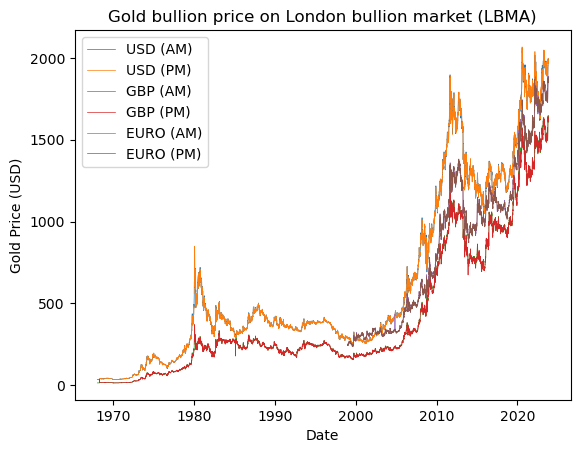

In [7]:


plt.plot(gold_bullion_price, linewidth=0.5, label=['USD (AM)','USD (PM)','GBP (AM)','GBP (PM)','EURO (AM)','EURO (PM)'])
plt.xlabel("Date")
plt.ylabel("Gold Price (USD)")
plt.title("Gold bullion price on London bullion market (LBMA)")
plt.legend()
plt.show()

In [13]:
gold_bullion_price.to_csv('/home/DataScience/Project_1/Data/LBMA-GOLD.csv')

In [ ]:
# importing data from ECB

# code below is a test

# code for this found here: https://www.pythonsherpa.com/static/files/html/ECB%20-%20Open%20Data.html

import requests 
import pandas as pd
import io

In [ ]:
# Building blocks for the URL
entrypoint = 'https://sdw-wsrest.ecb.europa.eu/service/' # Using protocol 'https'
resource = 'data'           # The resource for data queries is always'data'
flowRef ='EXR'              # Dataflow describing the data that needs to be returned, exchange rates in this case
key = 'D.CHF.EUR.SP00.A'    # Defining the dimension values, explained below

# Define the parameters
parameters = {
    'startPeriod': '1998-01-01',  # Start date of the time series , ECB was established in 1998 
    'endPeriod': '2018-10-01'     # End of the time series
}

In [ ]:
# Construct the URL: https://sdw-wsrest.ecb.europa.eu/service/data/EXR/D.CHF.EUR.SP00.A
request_url = entrypoint + resource + '/'+ flowRef + '/' + key

# Make the HTTP request
response = requests.get(request_url, params=parameters)

# Check if the response returns succesfully with response code 200
print(response)

# Print the full URL
print(response.url)

<Response [200]>
https://data-api.ecb.europa.eu/service/data/EXR/D.CHF.EUR.SP00.A?startPeriod=1970-01-01&endPeriod=2018-10-01


In [ ]:
# Print the first 1000 characters of the response
print(response.text[0:1000])

<?xml version="1.0" encoding="UTF-8"?><message:GenericData xmlns:message="http://www.sdmx.org/resources/sdmxml/schemas/v2_1/message" xmlns:common="http://www.sdmx.org/resources/sdmxml/schemas/v2_1/common" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns:generic="http://www.sdmx.org/resources/sdmxml/schemas/v2_1/data/generic" xsi:schemaLocation="http://www.sdmx.org/resources/sdmxml/schemas/v2_1/message http://data-api.ecb.europa.eu:80/vocabulary/sdmx/2_1/SDMXMessage.xsd http://www.sdmx.org/resources/sdmxml/schemas/v2_1/common http://data-api.ecb.europa.eu:80/vocabulary/sdmx/2_1/SDMXCommon.xsd http://www.sdmx.org/resources/sdmxml/schemas/v2_1/data/generic http://data-api.ecb.europa.eu:80/vocabulary/sdmx/2_1/SDMXDataGeneric.xsd">
<message:Header>
<message:ID>ada3e03f-7415-4979-a5be-c31e952de7d9</message:ID>
<message:Test>false</message:Test>
<message:Prepared>2023-10-31T22:21:37.204Z</message:Prepared>
<message:Sender id="ECB"/>
<message:Structure structureID="ECB_EXR1" dimensi

In [ ]:
# Make the HTTP request again, now requesting for CSV format
response = requests.get(request_url, params=parameters, headers={'Accept': 'text/csv'})
# Response succesful? (Response code 200)
print(response)

<Response [200]>


In [ ]:
response.text[0:1000]

'KEY,FREQ,CURRENCY,CURRENCY_DENOM,EXR_TYPE,EXR_SUFFIX,TIME_PERIOD,OBS_VALUE,OBS_STATUS,OBS_CONF,OBS_PRE_BREAK,OBS_COM,TIME_FORMAT,BREAKS,COLLECTION,COMPILING_ORG,DISS_ORG,DOM_SER_IDS,PUBL_ECB,PUBL_MU,PUBL_PUBLIC,UNIT_INDEX_BASE,COMPILATION,COVERAGE,DECIMALS,NAT_TITLE,SOURCE_AGENCY,SOURCE_PUB,TITLE,TITLE_COMPL,UNIT,UNIT_MULT\r\nEXR.D.CHF.EUR.SP00.A,D,CHF,EUR,SP00,A,1999-01-04,1.6168,A,,,,P1D,,A,,,,,,,,,,4,,4F0,,Swiss franc/Euro,"ECB reference exchange rate, Swiss franc/Euro, 2:15 pm (C.E.T.)",CHF,0\r\nEXR.D.CHF.EUR.SP00.A,D,CHF,EUR,SP00,A,1999-01-05,1.6123,A,,,,P1D,,A,,,,,,,,,,4,,4F0,,Swiss franc/Euro,"ECB reference exchange rate, Swiss franc/Euro, 2:15 pm (C.E.T.)",CHF,0\r\nEXR.D.CHF.EUR.SP00.A,D,CHF,EUR,SP00,A,1999-01-06,1.6116,A,,,,P1D,,A,,,,,,,,,,4,,4F0,,Swiss franc/Euro,"ECB reference exchange rate, Swiss franc/Euro, 2:15 pm (C.E.T.)",CHF,0\r\nEXR.D.CHF.EUR.SP00.A,D,CHF,EUR,SP00,A,1999-01-07,1.6165,A,,,,P1D,,A,,,,,,,,,,4,,4F0,,Swiss franc/Euro,"ECB reference exchange rate, Swiss fr

In [ ]:
# Read the response as a file into a Pandas DataFrame
df = pd.read_csv(io.StringIO(response.text))

In [ ]:
# Check the DataFrame's information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5119 entries, 0 to 5118
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   KEY              5119 non-null   object 
 1   FREQ             5119 non-null   object 
 2   CURRENCY         5119 non-null   object 
 3   CURRENCY_DENOM   5119 non-null   object 
 4   EXR_TYPE         5119 non-null   object 
 5   EXR_SUFFIX       5119 non-null   object 
 6   TIME_PERIOD      5119 non-null   object 
 7   OBS_VALUE        5057 non-null   float64
 8   OBS_STATUS       5119 non-null   object 
 9   OBS_CONF         238 non-null    object 
 10  OBS_PRE_BREAK    0 non-null      float64
 11  OBS_COM          0 non-null      float64
 12  TIME_FORMAT      5119 non-null   object 
 13  BREAKS           0 non-null      float64
 14  COLLECTION       5119 non-null   object 
 15  COMPILING_ORG    0 non-null      float64
 16  DISS_ORG         0 non-null      float64
 17  DOM_SER_IDS   

In [ ]:
# Show the last 5 entries of the DataFrame
df.tail()

,KEY,FREQ,CURRENCY,CURRENCY_DENOM,EXR_TYPE,EXR_SUFFIX,TIME_PERIOD,OBS_VALUE,OBS_STATUS,OBS_CONF,...,COMPILATION,COVERAGE,DECIMALS,NAT_TITLE,SOURCE_AGENCY,SOURCE_PUB,TITLE,TITLE_COMPL,UNIT,UNIT_MULT
5114,EXR.D.CHF.EUR.SP00.A,D,CHF,EUR,SP00,A,2018-09-25,1.1376,A,F,...,NaN,NaN,4,NaN,4F0,NaN,Swiss franc/Euro,"ECB reference exchange rate, Swiss franc/Euro,...",CHF,0
5115,EXR.D.CHF.EUR.SP00.A,D,CHF,EUR,SP00,A,2018-09-26,1.1369,A,F,...,NaN,NaN,4,NaN,4F0,NaN,Swiss franc/Euro,"ECB reference exchange rate, Swiss franc/Euro,...",CHF,0
5116,EXR.D.CHF.EUR.SP00.A,D,CHF,EUR,SP00,A,2018-09-27,1.1371,A,F,...,NaN,NaN,4,NaN,4F0,NaN,Swiss franc/Euro,"ECB reference exchange rate, Swiss franc/Euro,...",CHF,0
5117,EXR.D.CHF.EUR.SP00.A,D,CHF,EUR,SP00,A,2018-09-28,1.1316,A,F,...,NaN,NaN,4,NaN,4F0,NaN,Swiss franc/Euro,"ECB reference exchange rate, Swiss franc/Euro,...",CHF,0
5118,EXR.D.CHF.EUR.SP00.A,D,CHF,EUR,SP00,A,2018-10-01,1.1414,A,F,...,NaN,NaN,4,NaN,4F0,NaN,Swiss franc/Euro,"ECB reference exchange rate, Swiss franc/Euro,...",CHF,0
